# Trajectory Tracking Analysis - Publication Quality

This notebook demonstrates how to analyze trajectory tracking data from CSV files,
automatically detect trajectory planes, calculate RMSE metrics, and generate
publication-quality figures for your research paper.

## Features
- Automatic CSV loading with column name cleaning
- Automatic trajectory plane detection (XY, XZ, or YZ)
- RMSE calculation per trajectory and controller
- Publication-quality plots with LaTeX formatting
- PDF export for Overleaf/LaTeX documents
- Data tables with RMSE and computation time metrics

## 1. Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import *

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

## 2. Configuration

In [2]:
# Path to log files directory
logs_path = "log_files/"

# Output directory for figures and tables
output_path = "output/"
os.makedirs(output_path, exist_ok=True)

## 3. Load All CSV Files

This will automatically load all CSV files from the log_files directory and clean the column names.

In [3]:
# Load all CSV files
data_dict = load_all_csvs(logs_path)

print(f"Loaded {len(data_dict)} CSV files:")
for filename in data_dict.keys():
    print(f"  - {filename}")

Loaded 28 CSV files:
  - hardware_nr_enhanced_fig8_h.csv
  - simulation_mpc_triangle.csv
  - hardware_nr_enhanced_fig8_vs.csv
  - hardware_mpc_fig8_vs.csv
  - simulation_nr_enhanced_circle_v.csv
  - hardware_nr_enhanced_fig8_vt.csv
  - simulation_mpc_fig8_vt.csv
  - simulation_nr_enhanced_fig8_vt.csv
  - simulation_mpc_fig8_vs.csv
  - hardware_mpc_circle_h.csv
  - simulation_mpc_fig8_h.csv
  - simulation_nr_enhanced_circle_h.csv
  - hardware_nr_enhanced_sawtooth.csv
  - simulation_mpc_circle_v.csv
  - simulation_nr_enhanced_triangle.csv
  - hardware_mpc_fig8_vt.csv
  - hardware_mpc_fig8_h.csv
  - hardware_mpc_circle_v.csv
  - simulation_nr_enhanced_sawtooth.csv
  - hardware_mpc_triangle.csv
  - simulation_nr_enhanced_fig8_h.csv
  - simulation_mpc_sawtooth.csv
  - hardware_nr_enhanced_circle_v.csv
  - hardware_mpc_sawtooth.csv
  - hardware_nr_enhanced_triangle.csv
  - simulation_mpc_circle_h.csv
  - hardware_nr_enhanced_circle_h.csv
  - simulation_nr_enhanced_fig8_vs.csv


In [4]:
df = data_dict[list(data_dict.keys())[0]]  # Use the first file for demonstration

In [5]:
time = df['time'].values
time

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

## 4. Inspect Dataset Metadata

The system automatically extracts platform, controller, and trajectory information from the logged data columns (not from filenames).

In [6]:
# Print metadata for all datasets
print_dataset_metadata(data_dict)

# Get the first dataset for detailed inspection
print("\n" + "=" * 80)
print("DETAILED INSPECTION OF FIRST DATASET")
print("=" * 80)

first_file = list(data_dict.keys())[0]
df_sample = data_dict[first_file]

print(f"\nDataset: {first_file}")
print(f"Shape: {df_sample.shape}")
print(f"\nColumn names:")
print(df_sample.columns.tolist())
print(f"\nFirst few rows:")
df_sample.head()

Dataset Metadata (from logged data):

hardware_nr_enhanced_fig8_h.csv:
  Platform:    Hardware
  Controller:  NR Enhanced
  Trajectory:  Fig8 H
  Modifiers:   none

simulation_mpc_triangle.csv:
  Platform:    Simulation
  Controller:  MPC
  Trajectory:  Triangle
  Modifiers:   none

hardware_nr_enhanced_fig8_vs.csv:
  Platform:    Hardware
  Controller:  NR Enhanced
  Trajectory:  Fig8 VS
  Modifiers:   none

hardware_mpc_fig8_vs.csv:
  Platform:    Hardware
  Controller:  MPC
  Trajectory:  Fig8 VS
  Modifiers:   none

simulation_nr_enhanced_circle_v.csv:
  Platform:    Simulation
  Controller:  NR Enhanced
  Trajectory:  Circle V
  Modifiers:   none

hardware_nr_enhanced_fig8_vt.csv:
  Platform:    Hardware
  Controller:  NR Enhanced
  Trajectory:  Fig8 VT
  Modifiers:   none

simulation_mpc_fig8_vt.csv:
  Platform:    Simulation
  Controller:  MPC
  Trajectory:  Fig8 VT
  Modifiers:   none

simulation_nr_enhanced_fig8_vt.csv:
  Platform:    Simulation
  Controller:  NR Enhanced
  Tr

,time,x,y,z,yaw,platform,controller,traj_time,lookahead_time,trajectory,...,q,r,throttle_input,p_input,q_input,r_input,cbf_v_p,cbf_v_q,cbf_v_r,cbf_v_throttle
0,0.0,0.057373,-0.028847,-1.003265,0.010583,hw,nr_enhanced,0.0,1.2,fig8_horz,...,-0.128048,-0.384143,0.780565,0.276528,0.167040,0.378164,0.0,0.0,0.0,-2.261494
1,0.1,0.042787,0.111592,-1.021154,-0.015026,hw,nr_enhanced,0.1,1.2,fig8_horz,...,-0.008176,-0.024527,0.821191,0.254310,-0.007370,0.240474,0.0,0.0,0.0,-2.264669
2,0.2,0.012744,0.149399,-0.980647,0.007313,hw,nr_enhanced,0.2,1.2,fig8_horz,...,-0.001090,-0.003271,0.752512,-0.020043,0.049440,-0.145975,0.0,0.0,0.0,-1.814105
3,0.3,0.129578,0.073248,-1.097386,-0.015463,hw,nr_enhanced,0.3,1.2,fig8_horz,...,-0.059545,-0.178635,0.842707,-0.021667,0.028105,0.092110,0.0,0.0,0.0,-3.062893
4,0.4,0.128111,0.083087,-1.000118,-0.016505,hw,nr_enhanced,0.4,1.2,fig8_horz,...,0.037862,0.113587,0.871293,0.107001,-0.013238,0.189256,0.0,0.0,0.0,-2.009154


In [7]:
df_sample.traj_time[0:-1]

0       0.0
1       0.1
2       0.2
3       0.3
4       0.4
       ... 
294    29.4
295    29.5
296    29.6
297    29.7
298    29.8
Name: traj_time, Length: 299, dtype: float64

## 5. Automatic Trajectory Plane Detection

The system automatically detects which plane the trajectory is moving in (XY, XZ, or YZ) based on variance in the reference trajectory.

In [8]:
# Detect trajectory plane for each dataset
for filename, df in data_dict.items():
    plane = detect_trajectory_plane(df)
    print(f"{filename}: detected plane = {plane.upper()}")

hardware_nr_enhanced_fig8_h.csv: detected plane = XY
simulation_mpc_triangle.csv: detected plane = XY
hardware_nr_enhanced_fig8_vs.csv: detected plane = XZ
hardware_mpc_fig8_vs.csv: detected plane = XZ
simulation_nr_enhanced_circle_v.csv: detected plane = XZ
hardware_nr_enhanced_fig8_vt.csv: detected plane = XZ
simulation_mpc_fig8_vt.csv: detected plane = XZ
simulation_nr_enhanced_fig8_vt.csv: detected plane = XZ
simulation_mpc_fig8_vs.csv: detected plane = XZ
hardware_mpc_circle_h.csv: detected plane = XY
simulation_mpc_fig8_h.csv: detected plane = XY
simulation_nr_enhanced_circle_h.csv: detected plane = XY
hardware_nr_enhanced_sawtooth.csv: detected plane = YZ
simulation_mpc_circle_v.csv: detected plane = XZ
simulation_nr_enhanced_triangle.csv: detected plane = XY
hardware_mpc_fig8_vt.csv: detected plane = XZ
hardware_mpc_fig8_h.csv: detected plane = XY
hardware_mpc_circle_v.csv: detected plane = XZ
simulation_nr_enhanced_sawtooth.csv: detected plane = YZ
hardware_mpc_triangle.csv: d

## 6. RMSE Analysis

Calculate RMSE metrics for all datasets.

In [9]:
# Calculate RMSE for each file
print("RMSE Analysis:")
print("=" * 60)

for filename, df in data_dict.items():
    rmse_overall = calculate_overall_rmse(df)
    rmse_position = calculate_position_rmse(df)
    rmse_per_axis = calculate_rmse_per_axis(df)
    comp_time = calculate_mean_comp_time(df)
    
    print(f"\n{filename}:")
    print(f"  Overall RMSE (x,y,z,yaw): {rmse_overall:.4f} m")
    print(f"  Position RMSE (x,y,z):    {rmse_position:.4f} m")
    print(f"  Per-axis RMSE:")
    print(f"    X: {rmse_per_axis['x']:.4f} m")
    print(f"    Y: {rmse_per_axis['y']:.4f} m")
    print(f"    Z: {rmse_per_axis['z']:.4f} m")
    print(f"    Yaw: {rmse_per_axis['yaw']:.4f} rad")
    if comp_time is not None:
        print(f"  Mean computation time: {comp_time:.2f} ms")

RMSE Analysis:
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)

hardware_nr_enhanced_fig8_h.csv:
  Overall RMSE (x,y,z,yaw): 0.0679 m
  Position RMSE (x,y,z):    0.0679 m
  Per-axis RMSE:
    X: 0.0396 m
    Y: 0.0391 m
    Z: 0.0389 m
    Yaw: 0.0094 rad
  Mean computation time: 1.30 ms
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)

simulation_mpc_triangle.csv:
  Overall RMSE (x,y,z,yaw): 0.0346 m
  Position RMSE (x,y,z):    0.0345 m
  Per-axis RMSE:
    X: 0.0199 m
    Y: 0.0202 m
    Z: 0.0196 m
    Yaw: 0.0102 rad
  Mean computation time: 1.24 ms
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 sa

## 7. Generate Results Table

The table now automatically extracts platform, controller, and trajectory information from the logged data.

In [10]:
# Generate results table using metadata from logged data
# use_data_metadata=True extracts platform, controller, trajectory from the data columns
# This is more accurate than filename parsing
results_df = generate_results_table(data_dict, use_data_metadata=True)

print("Results Table:")
print("=" * 100)
print(results_df.to_string(index=False))

# Save as CSV
results_df.to_csv(f"{output_path}results_table.csv", index=False)
print(f"\n✓ Saved to {output_path}results_table.csv")

# Optional: If you want to use filename-based extraction (deprecated), use:
# results_df = generate_results_table(data_dict, use_data_metadata=False, 
#                                     controller_map={'nr': 'Newton-Raphson', ...},
#                                     trajectory_map={'circle': 'Circle', ...})

Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)


Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by

## 8. Export LaTeX Table

Generate a LaTeX-formatted table ready for your paper.

In [11]:
# Generate LaTeX table
latex_table = format_latex_table(results_df)

# Save to file
with open(f"{output_path}results_table.tex", 'w') as f:
    f.write(latex_table)

print("LaTeX Table:")
print(latex_table)
print(f"\nSaved to {output_path}results_table.tex")

LaTeX Table:
\begin{tabular}{llllrr}
\toprule
Platform & Controller & Trajectory & Modifiers & Position_RMSE_m & Comp_Time_ms \\
\midrule
Hardware & MPC & Circle H & - & 0.0424 & 1.2545 \\
Hardware & MPC & Circle V & - & 0.0360 & 1.2205 \\
Hardware & MPC & Fig8 H & - & 0.0540 & 1.2698 \\
Hardware & MPC & Fig8 VS & - & 0.0427 & 1.2308 \\
Hardware & MPC & Fig8 VT & - & 0.0542 & 1.2480 \\
Hardware & MPC & Sawtooth & - & 0.0352 & 1.2722 \\
Hardware & MPC & Triangle & - & 0.0522 & 1.2470 \\
Hardware & NR Enhanced & Circle H & - & 0.0502 & 1.2500 \\
Hardware & NR Enhanced & Circle V & - & 0.0445 & 1.2191 \\
Hardware & NR Enhanced & Fig8 H & - & 0.0679 & 1.3005 \\
Hardware & NR Enhanced & Fig8 VS & - & 0.0556 & 1.2176 \\
Hardware & NR Enhanced & Fig8 VT & - & 0.0695 & 1.2350 \\
Hardware & NR Enhanced & Sawtooth & - & 0.0441 & 1.2891 \\
Hardware & NR Enhanced & Triangle & - & 0.0629 & 1.2425 \\
Simulation & MPC & Circle H & - & 0.0274 & 1.2072 \\
Simulation & MPC & Circle V & - & 0.0234 & 1.26

## 9. Plot Single Trajectory (2D)

Create a publication-quality 2D trajectory plot with automatic plane detection.

Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)


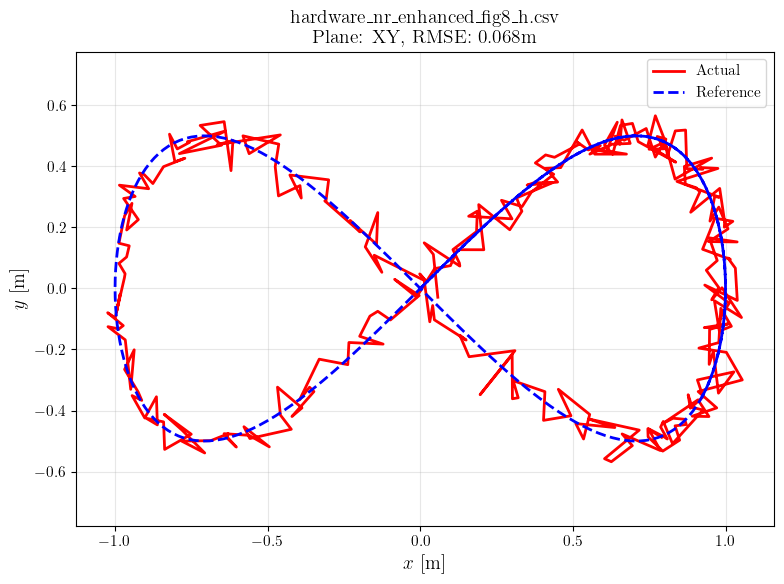

Saved to output/single_trajectory.pdf


In [12]:
# Setup publication style
setup_publication_style()

# Plot the first dataset
first_file = list(data_dict.keys())[0]
df_plot = data_dict[first_file]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_trajectory_2d(ax, df_plot)

plane = detect_trajectory_plane(df_plot)
rmse = calculate_position_rmse(df_plot)
ax.set_title(f"{first_file}\nPlane: {plane.upper()}, RMSE: {rmse:.3f}m", fontweight='bold')

plt.tight_layout()
plt.savefig(f"{output_path}single_trajectory.pdf", format='pdf', bbox_inches='tight')
plt.show()

print(f"Saved to {output_path}single_trajectory.pdf")

In [13]:
import matplotlib as mpl, shutil
print("usetex:", mpl.rcParams.get("text.usetex"))
print("latex in PATH:", shutil.which("latex"))
print("dvipng:", shutil.which("dvipng"))
print("dvisvgm:", shutil.which("dvisvgm"))
print("gs (ghostscript):", shutil.which("gs"))


usetex: True
latex in PATH: /usr/bin/latex
dvipng: /usr/bin/dvipng
dvisvgm: /usr/bin/dvisvgm
gs (ghostscript): /usr/bin/gs


## 10. Plot Time Series

Create time series plots showing position and yaw over time.

Aligning data: shifting reference values back by 1.20s (12 samples)
Figure saved to output/time_series.pdf


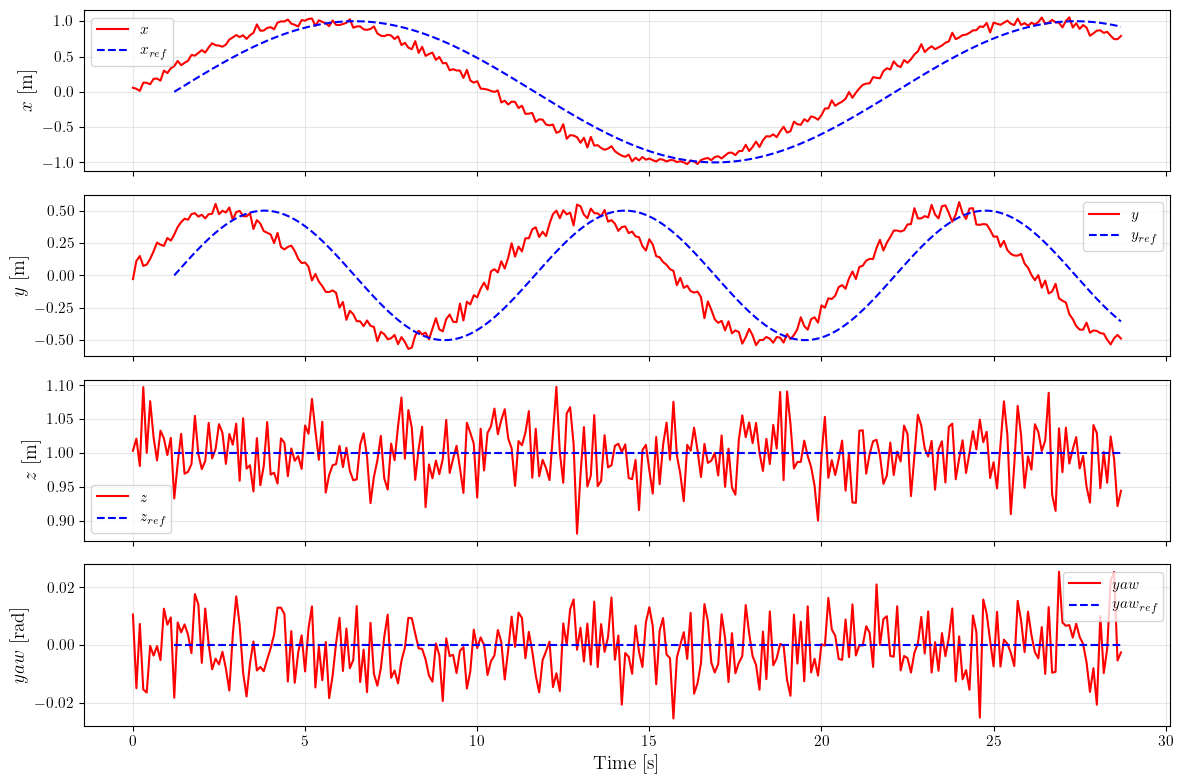

Saved to output/time_series.pdf


In [14]:
# Plot time series for first dataset
first_file = list(data_dict.keys())[0]
df_plot = data_dict[first_file]

fig = plot_time_series(df_plot, 
                       vars_to_plot=['x', 'y', 'z', 'yaw'],
                       save_path=f"{output_path}time_series.pdf")

plt.show()
print(f"Saved to {output_path}time_series.pdf")

## 11. Multi-Controller Comparison Plot

Create a comprehensive comparison plot with multiple controllers and trajectories.

**Note:** Customize the `controller_groups` dictionary based on your file naming convention.
The example below assumes files are named like `controller_trajectory.csv`.

In [15]:
# Define controller groups based on your file naming
# Customize this based on your actual file names!
controller_groups = {
    'With Sampling': [f for f in data_dict.keys() if 'sampling1' in f],
    'No Sampling': [f for f in data_dict.keys() if 'no_sampling1' in f],
}

# Remove empty groups
controller_groups = {k: v for k, v in controller_groups.items() if len(v) > 0}

if len(controller_groups) > 0:
    print("Controller groups:")
    for controller, files in controller_groups.items():
        print(f"  {controller}: {files}")
    
    # Create multi-controller comparison plot
    fig = plot_multi_controller_comparison(
        data_dict,
        controller_groups,
        figsize=(16, 8),
        save_path=f"{output_path}multi_controller_comparison.pdf"
    )
    
    plt.show()
    print(f"Saved to {output_path}multi_controller_comparison.pdf")
else:
    print("No controller groups found. Please customize the controller_groups dictionary above.")

No controller groups found. Please customize the controller_groups dictionary above.


## 12. Custom Analysis Example

Here's an example of how to create custom plots for specific use cases.

Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by 1.20s (12 samples)
Aligning data: shifting reference values back by

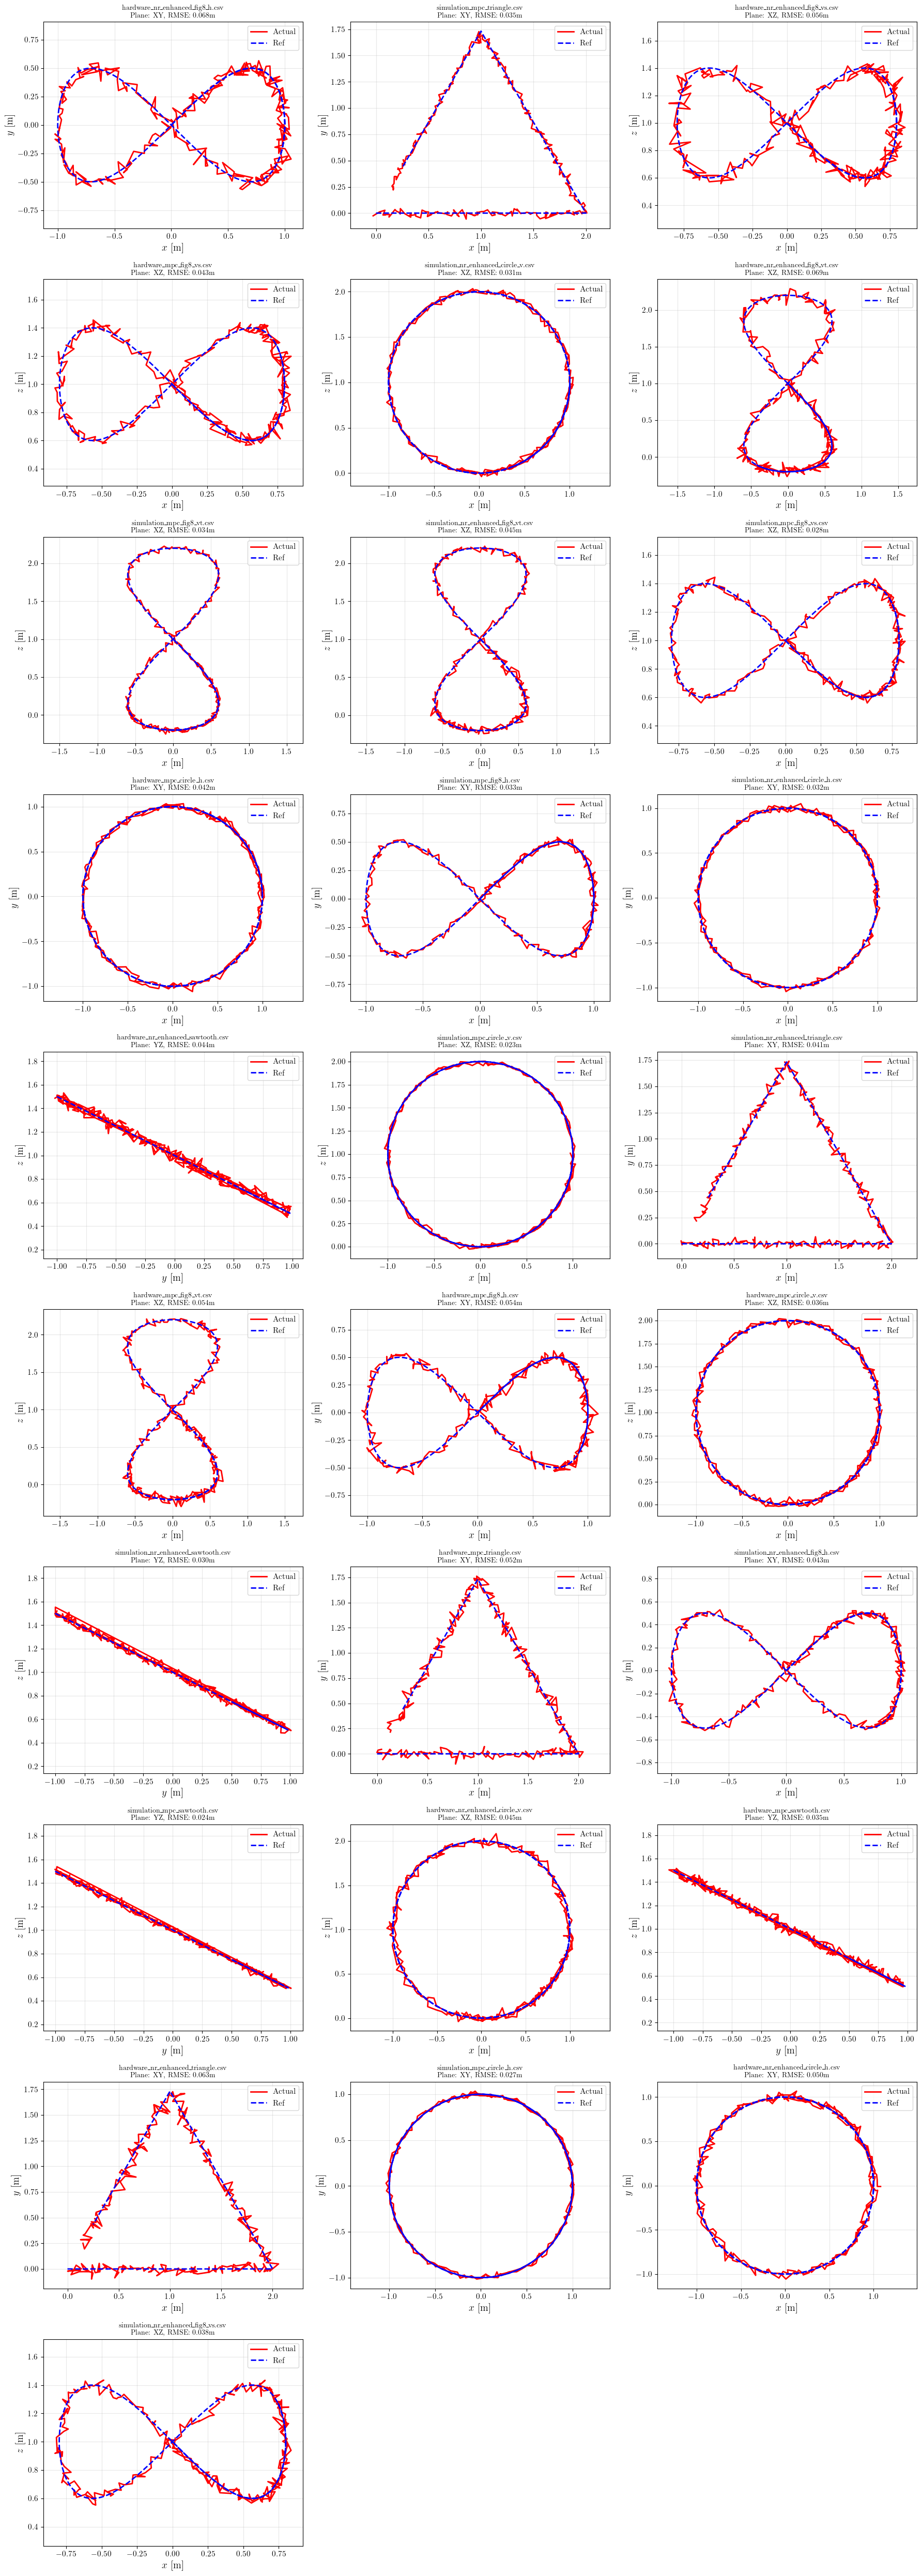

Saved to output/all_trajectories_grid.pdf


In [16]:
# Example: Create a grid of all trajectories
setup_publication_style()

n_files = len(data_dict)
n_cols = min(3, n_files)  # Max 3 columns
n_rows = (n_files + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
if n_files == 1:
    axes = np.array([axes])
axes = axes.flatten()

for idx, (filename, df) in enumerate(data_dict.items()):
    ax = axes[idx]
    plot_trajectory_2d(ax, df, actual_label='Actual', ref_label='Ref')
    
    plane = detect_trajectory_plane(df)
    rmse = calculate_position_rmse(df)
    ax.set_title(f"{filename}\nPlane: {plane.upper()}, RMSE: {rmse:.3f}m", 
                fontsize=10, fontweight='bold')

# Hide unused subplots
for idx in range(n_files, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(f"{output_path}all_trajectories_grid.pdf", format='pdf', bbox_inches='tight')
plt.show()

print(f"Saved to {output_path}all_trajectories_grid.pdf")

## 13. Summary

### Key Features:
- **Automatic Metadata Extraction**: Platform, controller, and trajectory information is extracted directly from the logged data columns (not from filenames)
- **Trajectory Modifiers**: Automatically detects and includes 2x speed and spinning modifiers
- **Automatic Plane Detection**: Detects whether trajectories are in XY, XZ, or YZ planes
- **Publication-Quality Outputs**: LaTeX-formatted tables and high-resolution PDF figures

### Output Files Generated:
- `output/results_table.csv` - Results in CSV format with Platform, Controller, Trajectory, Modifiers, RMSE, and Computation Time
- `output/results_table.tex` - LaTeX table ready for your paper
- `output/single_trajectory.pdf` - Example single trajectory plot
- `output/time_series.pdf` - Time series plot
- `output/multi_controller_comparison.pdf` - Multi-controller comparison
- `output/all_trajectories_grid.pdf` - Grid of all trajectories

### How It Works:
The analysis now uses the enumeration values logged in your data:
- `platform` column (0=Sim, 1=Hardware)
- `controller` column (0=NR Standard, 1=NR Enhanced, 2=MPC)
- `trajectory` column (0=Hover, 1=Circle H, 2=Circle V, 3=Fig8 H, etc.)
- `traj_double` and `traj_spin` boolean columns for trajectory modifiers

This approach is **more accurate** than filename parsing and ensures your analysis always reflects the actual test configuration.

### Next Steps:
1. Run your experiments and save the data to `log_files/` directory
2. Run this notebook to generate analysis
3. Include the generated PDF figures in your Overleaf document
4. Copy the LaTeX table code into your paper

### Tips:
- All metadata is automatically extracted from your logged data - no manual filename parsing needed!
- The system detects trajectory planes (XY, XZ, YZ) automatically based on variance
- All plots use publication-quality LaTeX formatting
- RMSE is calculated separately for position (x,y,z) and overall (x,y,z,yaw)